In [1]:
from IPython.display import YouTubeVideo

# W4 Lab Assignment

The aims of today's lab is 

1. to do a mini-experiment of the Stevens' power-law (of course you can conduct your own psychophysics experiments!)
2. to play with matplotlib's colormaps, including the awesome `vidiris`. 

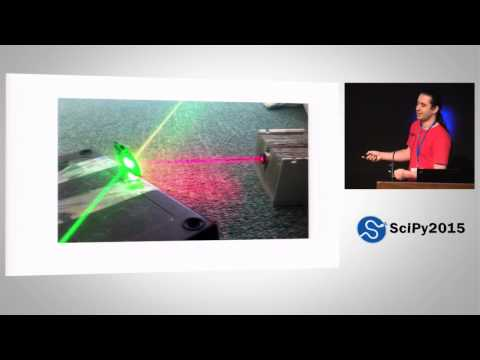

In [2]:
YouTubeVideo("xAoljeRJ3lU")

First, import `numpy` and `matplotlib` libraries (don't forget the `matplotlib inline` magic command). 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Stevens’ power-law and your own psychophysics experiment!

Let's do the experiment. The procedure is as follows:

1. Generate a random number between \[0.01,0.1\].
1. Create a horizontal bar whose length equals to the random number.
1. Compare the "random bar" to two other bars with fixed length 0.01 and 0.1. Guess the length of the random bar.
1. Store your guess (perceived length) and actual length to two lists respectively.
1. Re-generate the random bar so that it has a different length. Repeat the above steps many times.
1. Plot the list of perceived length and the list of actual length. In this way we can check whether Steven's power-law holds.

First, we use two lists to store perceived and actual length.

In [11]:
import random
import time

length_perceived = []
length_actual = []

## Perception of length

Let's run the experiment.

The [**`random`**](https://docs.python.org/3/library/random.html) module in Python provides various random number generators. In particular, the [**`random.uniform(a,b)`**](https://docs.python.org/3/library/random.html#random.uniform) function returns a float in \[a,b\]. 

We can plot horizontal bars using the [**`pyplot.barh()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh) function. The lengths of them are 0.01, (the random number), 0.1. Using this function, produce a bar graph that looks like this, so that the random bar is in the middle:

![](stevenspowerlaw_barh.png)

<Container object of 3 artists>

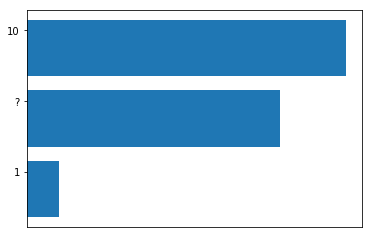

In [39]:
plt.gca().set_frame_on(True)
plt.gca().get_xaxis().set_visible(False)
plt.yticks(np.arange(3)+0.25, ('1', '?', '10'))

# (1) generate a random number in [0.01, 0.1) using random.uniform(a,b) function
# random.uniform(a, b)
#   Return a random floating point number N such that: 
#     a <= N <= b for a <= b and b <= N <= a for b < a.
#   The end-point value b may or may not be included in the range depending
#   on floating-point rounding in the equation a + (b-a) * random().

a = 0.01
b = 0.1
N = random.uniform(a,b)

# (2) plot horizontal bars: 0.1 on the top, 0.01 on the bottom, and random bar is in the middle
# matplotlib.pyplot.barh(bottom, width, ...)
#   bottom : scalar or array-like; the y coordinate(s) of the bars
#   width : scalar or array-like; the width(s) of the bars

plt.barh(bottom = np.arange(3), width = (a,N,b))

From the plot above, guess the ratio between the length of the middle and the bottom bar. We can think of this more directly: If the length of the bottom bar is 1 and the top one is 10, what is the length of the middle one?

Put your guess (perceived length) in the list `length_perceived`. And the actual length in the list `length_actual`.

In [40]:
# (3) guess the length of the random length bar (between 1 and 10)
guess = float(input("Guess the length of the middle bar: "))

# save the actual length (scaled due to "guess range"), and the guess in corresponding arrays
length_actual.append(N*100.0)
length_perceived.append(guess)

Guess the length of the middle bar: 8.0


In [41]:
print(length_actual)
print(length_perceived)

[3.17031926471385, 3.357859038686315, 7.64920905305692, 3.277793616615394, 4.235739925854688, 5.289122689129005, 8.149475800752795, 4.563552414229762, 4.738962774571647, 7.945157052350021]
[3.5, 4.0, 8.0, 3.7, 4.2, 5.0, 8.0, 4.5, 4.5, 8.0]


## Obtaining and plotting the data

Run the above two cells many times, namely: (1) generate a random bar graph, (2) put your guess into `length_perceived` while entering the actuall ratio into `length_actual`

Now we can draw the scatter plot by plotting `length_perceived` and `length_actual` in the same figure. The [**`scatter()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) function will do this. Here is an example of how to use `scatter`:

In [38]:
plt.scatter([1,5,10], [1,10, 5])

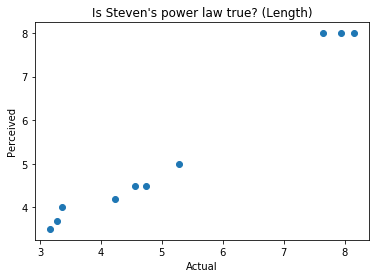

In [42]:
# (4) plot the Actual vs. Perceived bar lengths, using a scatter plot
plt.title("Is Steven's power law true? (Length)")
plt.xlabel("Actual")
plt.ylabel("Perceived")
plt.scatter(length_actual, length_perceived)

After plotting, let's fit the relation between actual and perceived lengths using a polynomial function. We can easily do it using [**`curve_fit(f, x, y)`**](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) in Scipy, which is to fit $x$ and $y$ using the function `f`. In our case, $f = a*x^b +c$. For instance, we can check whether this works by creating a fake dataset that follows the exact form:

In [43]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.power(x, b) + c

x = np.arange(20)  # [0,1,2,3, ..., 19]
y = np.power(x, 2) # [0,1,4,9, ... ]

popt, pcov = curve_fit(func, x, y)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

1.00 x^2.00 + -0.00


Now you can fit your data. 

In [44]:
# (5) fit the observed data (actual and perceived bar lengths)
# since this will be plotted, it helps to sort the observations in increasing order
# we use a DataFrame to do this quickly, efficiently, and simply

import pandas as pd
df = pd.DataFrame(columns=['actual', 'perceived'])
df.actual = length_actual
df.perceived = length_perceived
dfs = df.sort_values(by='actual')
sorted_actual = dfs.actual.values
sorted_perceived = dfs.perceived.values

# create the fit
popt, pcov = curve_fit(func, sorted_actual, sorted_perceived)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

0.07 x^2.10 + 2.90


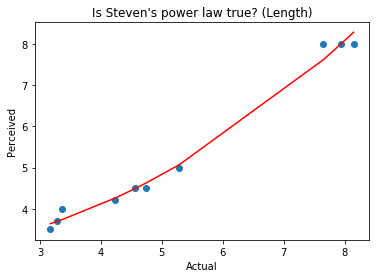

In [45]:
# now we can plot again, with the fit curve
plt.title("Is Steven's power law true? (Length)")
plt.xlabel("Actual")
plt.ylabel("Perceived")
plt.scatter(sorted_actual, sorted_perceived)
plt.plot(sorted_actual, func(sorted_actual, *popt), 'r-', label='fit')

## Perception of area

Similar to the above experiment, we now represent a random number as a circle, and the area of the circle is equal to the number.

First, calculate the radius of a circle from its area and then plot using the **`Circle()`** function. `plt.Circle((0,0), r)` will plot a circle centered at (0,0) with radius `r`.

In [39]:
# import math

radius1 = math.sqrt(0.01/math.pi) # area = pi * r * r
radius2 = math.sqrt(0.1/math.pi)

plt.axis('equal')
plt.axis('off')
circ1 = plt.Circle( (0,0),         radius1, clip_on=False )
circ2 = plt.Circle( (4*radius2,0), radius2, clip_on=False )
plt.gca().add_artist(circ1)
plt.gca().add_artist(circ2)


![](stevenspowerlaw_circle.png)

Write the code to run the experiment in a similar way: add a circle with random radius, store perceived/actual values, etc. plot and fit your results in the cell below. (Feel free to create multiple cells below)

In [8]:
# Your code


Show the scatter plot and the curve fit. Does it follow Stevens' power-law?

In [19]:
# Your code



# Colormaps

To start, let's plot a sine and cosine wave respectively with red and green color.

In [40]:
x = np.linspace(0, 3*np.pi)
plt.plot(x, np.sin(x), color='r', lw=3)
plt.plot(x, np.sin(x-np.pi), color='g', lw=3)

We can also use different color schemes in matplotlib. Here you can find them

http://matplotlib.org/users/colormaps.html

In [41]:
plt.plot(x, np.sin(x), color=plt.cm.Accent(0), lw=3)
plt.plot(x, np.sin(x-np.pi), color=plt.cm.Accent(1.0), lw=3)

In [42]:
num_lines = 5
x = np.linspace(0, 4*np.pi)
shift = np.linspace(0, np.pi, num_lines)
color_idx = np.linspace(0, 1, num_lines)
for i in range(len(color_idx)):
    plt.plot(x, np.sin(x - shift[i]), color=plt.cm.Accent(color_idx[i]), lw=3)

Pick two color schemes from ![qualitative colormaps](http://matplotlib.org/_images/colormaps_reference_04.png) and reproduce the above plot.

In [23]:
# Your code


# Seaborn color palettes

These are essentially based on matplotlib, but Seaborn makes pre-defined, good-looking palettes that you can use.

See: http://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
    http://seaborn.pydata.org/tutorial/color_palettes.html


In [24]:
import seaborn as sns

From http://seaborn.pydata.org/examples/timeseries_of_barplots.html

In [43]:
sns.set(style="white")

# Load the example planets dataset
planets = sns.load_dataset("planets")
years = np.arange(2000, 2015)

#Make a barplot with default color
g = sns.factorplot(x="year", data=planets, kind="count", size=4, aspect=1.5, order=years)

To specify a palette:

In [44]:
g = sns.factorplot(x="year", data=planets, kind="count", size=4, aspect=1.5, order=years, palette="muted")

We can also create a palette, and pass it as an argument:

In [45]:
p = sns.cubehelix_palette(15)
g = sns.factorplot(x="year", data=planets, kind="count", size=4, aspect=1.5, order=years, palette=p)

# Colormap and images

http://matplotlib.org/users/image_tutorial.html

We can also display an image using Colormaps. First read it using the [`imread()`](http://matplotlib.org/api/image_api.html#matplotlib.image.imread) function that returns an `numpy.array()`.

In [28]:
import matplotlib.image as mpimg

In [29]:
img = mpimg.imread('sneakySnake.png')

In [46]:
plt.imshow(img)

How does `img` store the image? Run the following cells

In [47]:
img

In [48]:
np.shape(img)

This means that `img` is a three-dimensional array with 219 x 329 x 4 numbers. If you look at the image, you can easily see that 219 and 329 are the dimensions (height and width in terms of the number of pixels) of the image. What is 4? 

We can actually create our own small image to investigate. Let's create a 3x3 image. 

In [49]:
myimg = np.array([ [[1,0,0,1], [1,1,1,1], [1,1,1,1]], 
                   [[1,1,1,1], [1,1,1,1], [1,0,0,1]], 
                   [[1,1,1,1], [1,1,1,1], [1,0,1,0.5]] ])
plt.imshow(myimg)

Why are they blurred? It should have only 3 pixels across, right? It's because of `interpolation`. By setting it to `nearest` you can get the raw pixel values more clearly. 

In [50]:
plt.imshow(myimg, interpolation="nearest")

Play with the values of the matrix, and explain what are each of the four dimensions (this matrix is 3x3x**4**) below. 

YOUR ANSWER HERE


## Applying other colormaps

Let's assume that the first value of the four dimensions represents some data of your interest. You can obtain `height x width x 1` matrix by doing `img[:,:,0]`, which means give me the all of the first dimension (`:`), all of the second dimension (`:`), but only the first one from the last dimension (`0`). 

In [51]:
plt.pcolormesh(img[:,:,0], cmap=plt.cm.viridis)
plt.colorbar()

Why is it flipped upside down? Take a look at the previous `imshow` example closely and compare the axes across these two displays. Below, flip the figure upside down to show it properly. This function [`numpy.flipud()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.flipud.html) should be handy. 

In [36]:
# your code
